# julia_demo1_ajw
# Brief introduction to signal processing in Julia
# using the Jupyter Notebook
# Available online

AJW 2017-04-24 Updated 24 April 2019

** added section on how to simulate: A first order RC LPF  (derived from time domain impulse response)

AJW 2017-03-03 Updated 9 April 2019

*added section on "zero-padding" to provide a finer sample spacing in freq domain.

*fixed definition of rect2(t) = (abs.(t).<=0.5)*1.0

*fixed some of the axes on frequency plots

*added a plot of the discrete impulse response of a LPF and BPF


Julia language website   https://julialang.org/

Online Julia notebook (called Jupyter Notebook)   http://juliabox.com 

Tutorials: see "tutorials" folder in juliabox.com
           also https://julialang.org/learning/

NB: Currently choose kernal option "julia 1.0" in juliabox

For help with plotting (google for "julia PyPlot")  https://gist.github.com/gizmaa/

The documentation of generic FFT functionality can be found in the AbstractFFTs.jl package.
https://juliamath.github.io/AbstractFFTs.jl/latest/api.html#Public-Interface-1



## Create a sampled sinusoid and plot it using PyPlot library

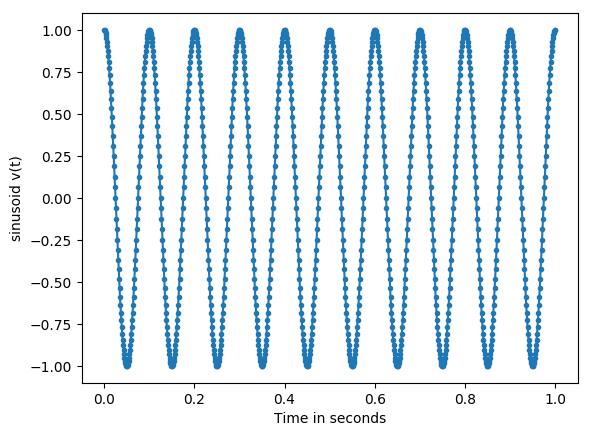

length(t) = 1001


In [80]:
using PyPlot     # This library is already installed in juliabox 
# (PyPlot takes about 10s to load initially; thereafter it is fast)

Δt = 0.001  # time step  (to get Greek sybmol, type \Delta <tab>)
t = 0:Δt:1;  #Define time from 0 to 1s in steps of 0.01s

println("length(t) = ",length(t))

f0 = 10  # 10 Hz
ω0 = 2*pi*f0;   # rad/s   ( Greek symbol \omega <tab>  )
A = 1

v = A*cos.(ω0*t);   # Create an array holding the sinusoid values

figure()
plot(t,v,".-")

xlabel("Time in seconds");
ylabel("sinusoid v(t)");

# Download the FFTW library  (not pre-installed in juliabox)

In [81]:
# Download the FFTW library  (not pre-installed in juliabox)

using Pkg    # Use the package manager
Pkg.add("FFTW")    # This may take a minute or two to download FFTW from Github, compile and install.

# You only have to do this once - there after it remains installed in your Juliabox environment
# If you run it again, it will only download if a newer version is available.

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


## Inspect in frequency domain


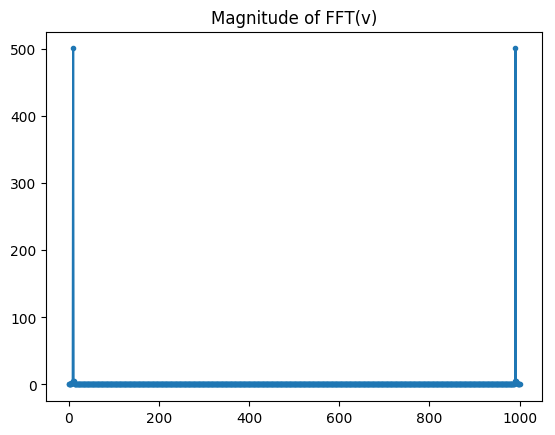

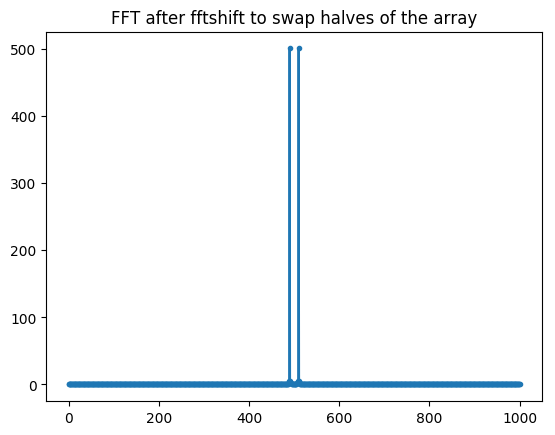

In [82]:
# Inspect in frequency domain

using FFTW   # Import Fourier library

V = fft(v)

figure()
plot(abs.(V),".-")  # Note elts 1:N/2 pos freq components; N/2+1:N contain neg freq components
title("Magnitude of FFT(v)")
figure()
plot( fftshift(abs.(V)),".-")   # swap around halves of array so that plot show zero Hz in middle
title("FFT after fftshift to swap halves of the array");

# How to label the axes in Hz

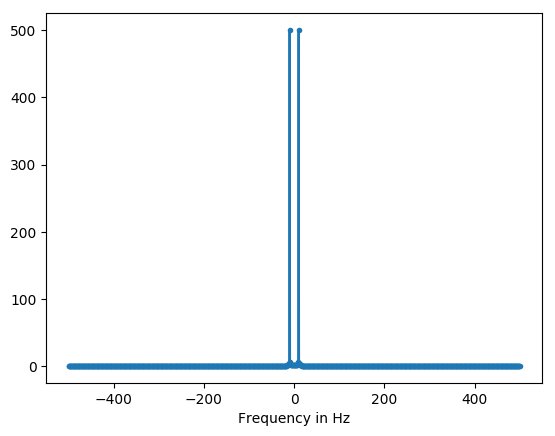

In [83]:
#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt)  # spacing in frequency domain


#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0    # case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

figure();
plot(f_axis, fftshift(abs.(V)),".-");
xlabel("Frequency in Hz");

## Zero-Padding

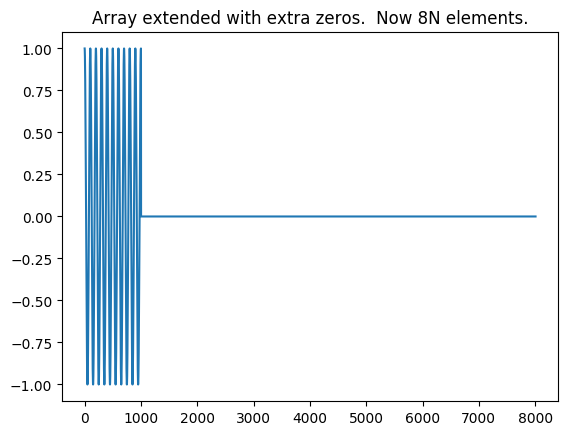

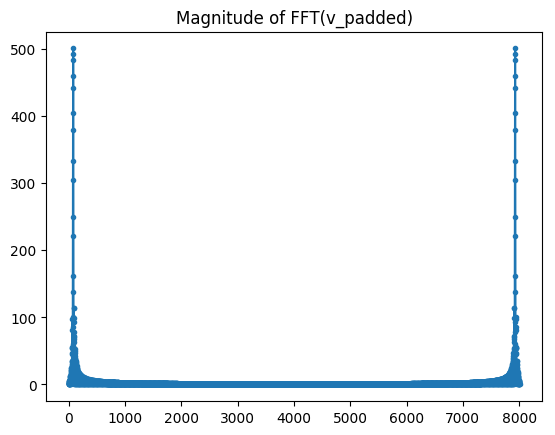

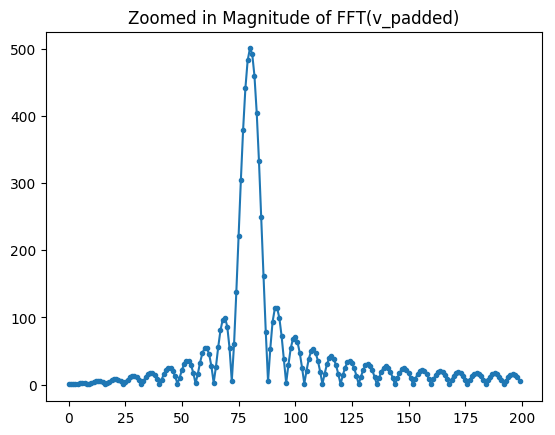

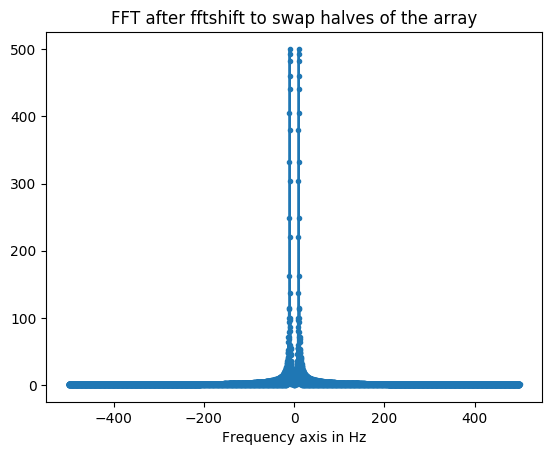

PyObject Text(0.5,24,'Frequency axis in Hz')

In [84]:
# Zero-padding technique to create a finer sample spacing in the frequency domain
# The DFT maps N samples into N samples in the frequency domain.
# Zero-padding increases the time-domain array length, and hence provides more samples in the frequency domain.
# This allows one to see that the DFT of a finite length sinusoid produces sample Sa() functions, not Dirac impulses.

v_padded = [v; zeros(7*N)]   # Create an extended array, with 8N samples (by adding 7N extra zeros)

N_new = length(v_padded)
Δf_new = 1/(N_new*Δt)  # new spacing in frequency domain
#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N_new,2)==0    # case N even
    f_axis_new = (-N_new/2:N_new/2-1)*Δf_new;    
else   # case N odd
    f_axis_new = (-(N_new-1)/2 : (N_new-1)/2)*Δf_new; 
end

figure()
plot(v_padded)
title("Array extended with extra zeros.  Now 8N elements.")

V_padded = fft(v_padded)

figure()
plot(abs.(V_padded),".-")  # Note elts 1:N/2 pos freq components; N/2+1:N contain neg freq components
title("Magnitude of FFT(v_padded)")


figure()
plot(abs.(V_padded[1:200]),".-")  # Note elts 1:N/2 pos freq components; N/2+1:N contain neg freq components
title("Zoomed in Magnitude of FFT(v_padded)")


figure()
plot(f_axis_new,fftshift(abs.(V_padded)),".-")   # swap around halves of array so that plot show zero Hz in middle
title("FFT after fftshift to swap halves of the array");
xlabel("Frequency axis in Hz")

# Generate Gaussian noise

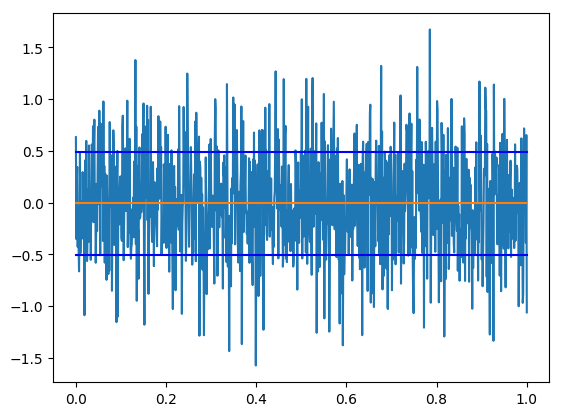

N = 1001
Mean = -0.006111493912821779
Std dev = 0.49655756376803334


In [85]:
# Now generate some noise

N = length(t);

noise = randn(N);  # Create an array of N zero-mean Gaussian random number of std dev = 1.

μ = 0.0     # desired mean
σ = 0.5   # desired standard deviation  NOTE: to create Greek symbol, \sigma<tab>
noise = noise*σ .+ μ

figure()
plot(t,noise)

# Calculate statistics:  mean and standard deviation
using Statistics  #The Statistics module contains basic statistics functionality (mean, std, var etc.)

noise_mean = mean(noise)
noise_std = std(noise)

# Print the values
println("N = ",N)
println("Mean = ",noise_mean)     
println("Std dev = ",noise_std)

# Add horizontal lines onto the plot showing the mean level and +- std dev
plot(t,ones(N)*noise_mean)
plot(t,ones(N)*(noise_mean+noise_std),"b")
plot(t,ones(N)*(noise_mean-noise_std),"b");


## Plot a Histogram

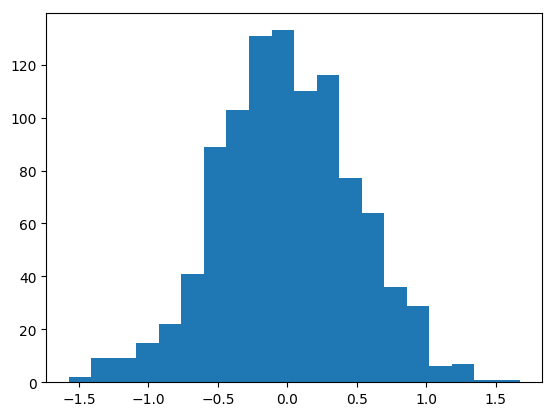

In [86]:
figure()
nbins = 20
hist(noise,nbins);

# Add noise to the sine wave

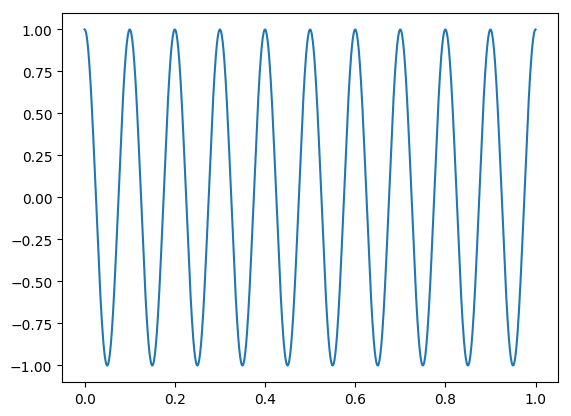

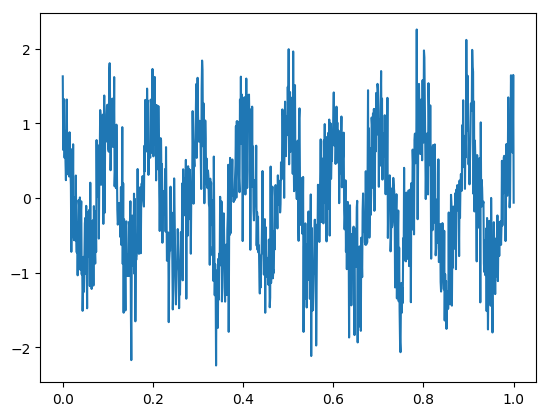

In [87]:
y = v + noise;
figure()
plot(t,v);  # Plot signal plus noise
figure()
plot(t,y);  # Plot signal with noise 

# Inspect in frequency domain

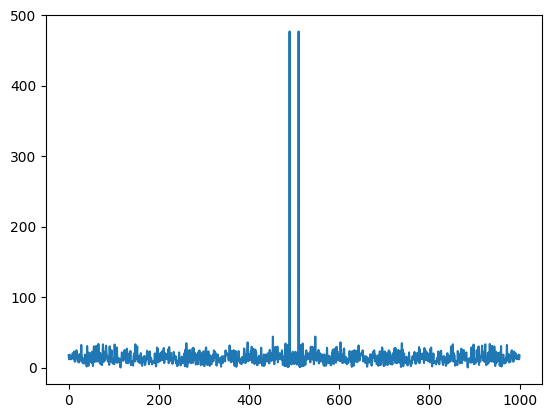

In [88]:
Y = fft(y)   # noisy signal

figure()
plot( fftshift(abs.(Y)));

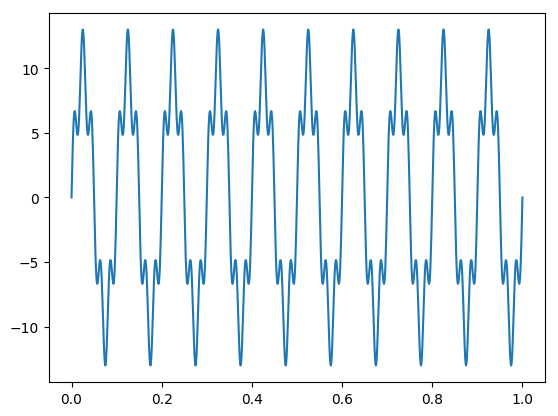

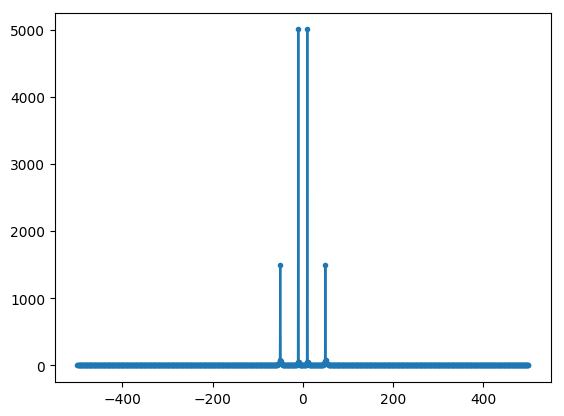

In [89]:
# Try creating a signal with two sinusoids of different frequencies

#t = 0:0.001:1;  #Define time from 0 to 1s in steps of 0.01s
f1 = 10
f2 = 50

v = 10*sin.(2*pi*f1*t) + 3*sin.(2*pi*f2*t);
figure()
plot(t,v)

V = fft(v)
figure()
plot(f_axis, fftshift(abs.(V)),".-");


# Fourier transform of a (shifted) rect() function

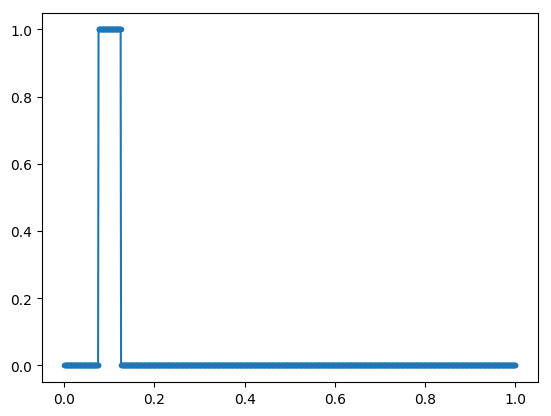

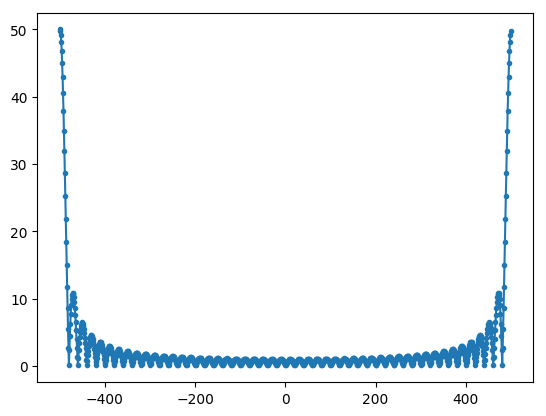

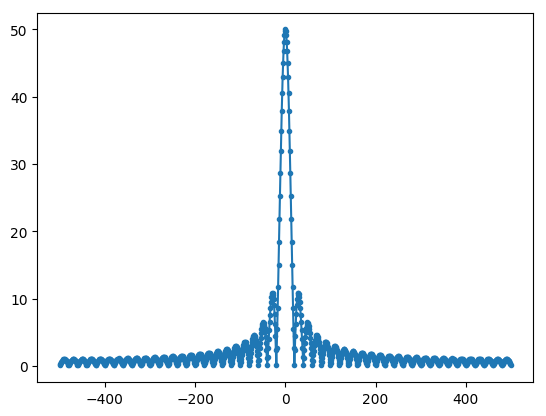

In [90]:
# Define a rect(t) function - the input can be an N-elt array of t values

function rect(t)
    N = length(t)
    x = zeros(N)  # create array of zeros
    for n=1:N
        abs_t = abs(t[n]);    
        if abs_t > 0.5 
            x[n]=0.0
        elseif abs_t < 0.5 
            x[n]=1.0
        else
            x[n]=0.5     # case of t[n] = 0.5 (rising edge) or -0.5 (falling edge) 
        end
    end
    return x
end


# Very simple one-line definition of a rect function. Value is 0 or 1.
rect2(t) = (abs.(t).<=0.5)*1.0

Tp = 0.05  # pulse width in seconds
t_shift = 0.1   # Shift pulse to right so it starts after t=0.

pulse = rect2( (t .- t_shift)/Tp)

figure()
plot(t,pulse,".-")

figure()
plot(f_axis,(abs.(fft(pulse))),".-");   # First FFT (without fftshift)

figure()
plot(f_axis,fftshift(abs.(fft(pulse))),".-");


## Fourier transform (DFT) of a pulse train (e.g. a square wave)

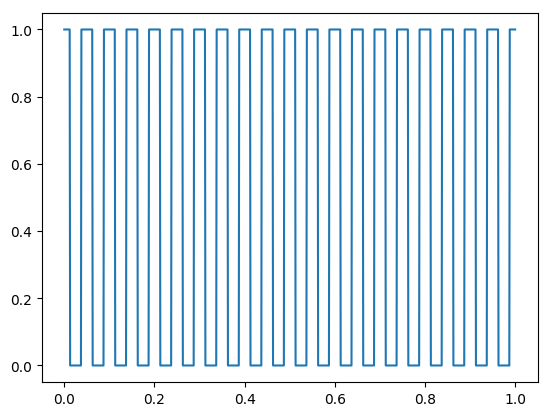

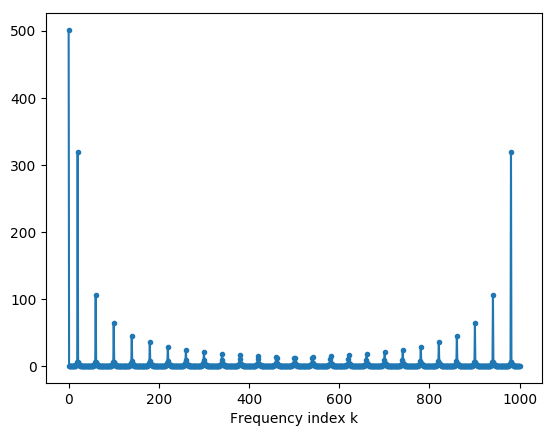

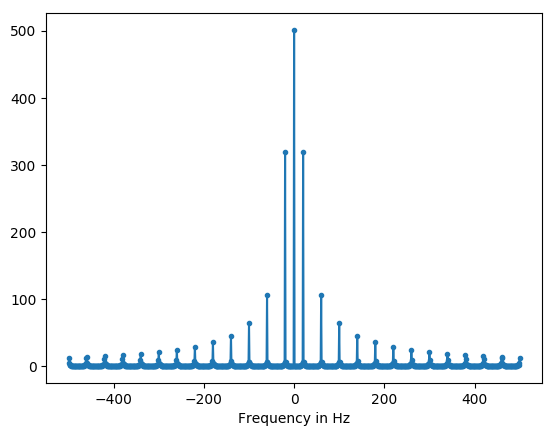

In [92]:
# Define a square wave

function pulse_train(t,Tpulse,Tperiod)
    N = length(t)
    result = zeros(N)
    for n=1:N
        t_wrap = mod(t[n]+Tperiod/2,Tperiod)-Tperiod/2
        result[n] = 1.0*(abs(t_wrap)<=Tpulse/2)
    end
    return result
end

#Tpulse = 1
#Tperiod = 10.0
#t=-30:0.1:30

Tpulse = 0.025  # Pulse width
Tperiod = 0.05  # Period of pulse train
ω0 = 2*π/Tperiod  # Fundamental frequency
#t=0:dt:1 define much earlier


###win(t)=(1-cos(2*pi*t))/2;   # hack - fix later


x = pulse_train(t,Tpulse,Tperiod)

figure()
plot(t,x)

X = fft(x);

# Plot FFT
figure();
plot(abs.(X),".-");
xlabel("Frequency index k");

#Label the frequency axis in Hz
figure();
plot(f_axis, fftshift(abs.(X)),".-");
xlabel("Frequency in Hz");

# Create a LPF

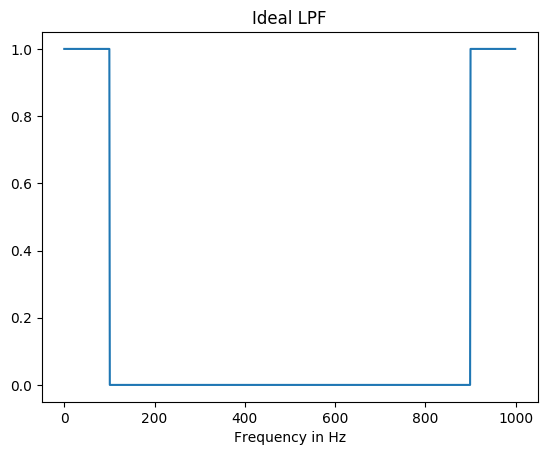

PyObject Text(0.5,24,'Frequency in Hz')

In [93]:
# 

Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s

ω = 0:Δω:(N-1)*Δω
f = ω/(2*π)
B = 100 # filter bandwidth in Hz

# In the sampled frequency domain. add a rect centred on zero to one centred at the next repeat
# i.e. centred on 0 rad/s an on 2pi/Δt rad/s.

H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )

figure()
plot(f,H);    # Note, H in this case is purely real.
title("Ideal LPF")
xlabel("Frequency in Hz")

## Passing the square wave through a LPF  (done in Frequency Domain)

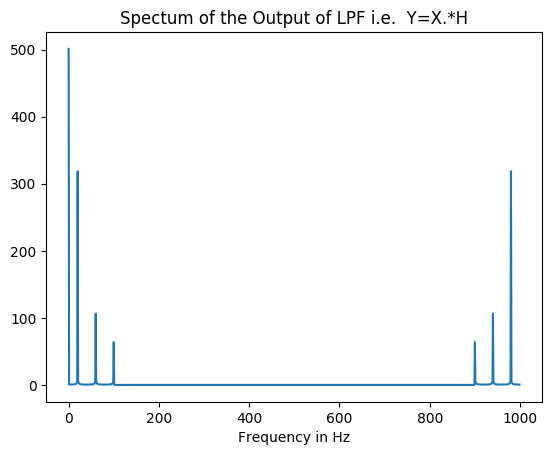

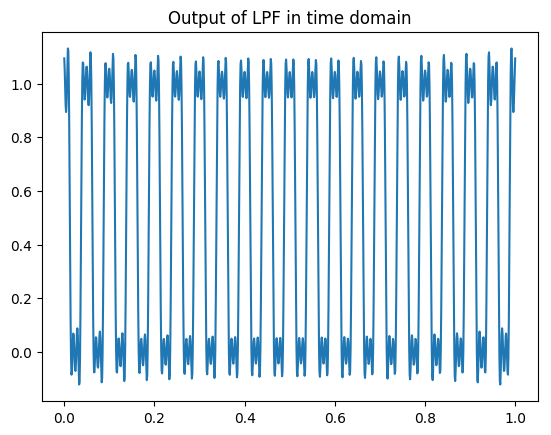

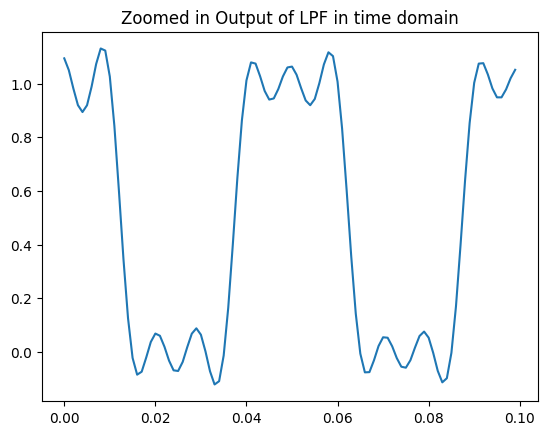

In [94]:
Y = X .* H

figure()
plot(f,abs.(Y))
title("Spectum of the Output of LPF i.e.  Y=X.*H")
xlabel("Frequency in Hz")

y = ifft(Y)   # Transform back to time domain using inverse transform

figure()
plot(t,y)
title("Output of LPF in time domain");

figure()
plot(t[1:100],y[1:100])
title("Zoomed in Output of LPF in time domain");


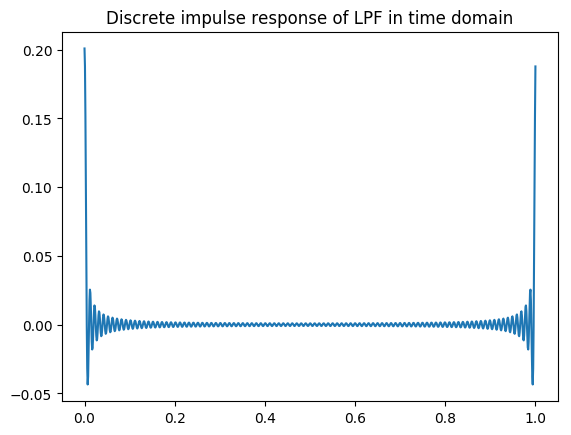

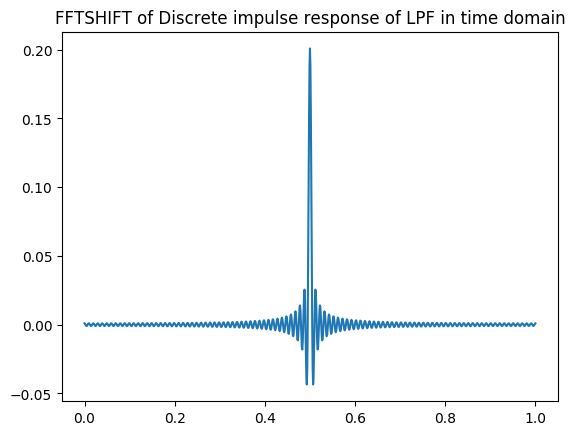

PyObject Text(0.5,1,'FFTSHIFT of Discrete impulse response of LPF in time domain')

In [95]:
# Plot discrete impulse response of LPF by taking the ifft
# This will show the first period of a repeating time domain

figure()
plot(t,ifft(H))
title("Discrete impulse response of LPF in time domain")

# Plot fftshift version.  0s is now in the centre.
# the time axis has not been relabeleld correctly.
figure()
plot(t,fftshift(ifft(H)))
title("FFTSHIFT of Discrete impulse response of LPF in time domain")


## Passing the square wave through a BPF  (done in Frequency Domain)

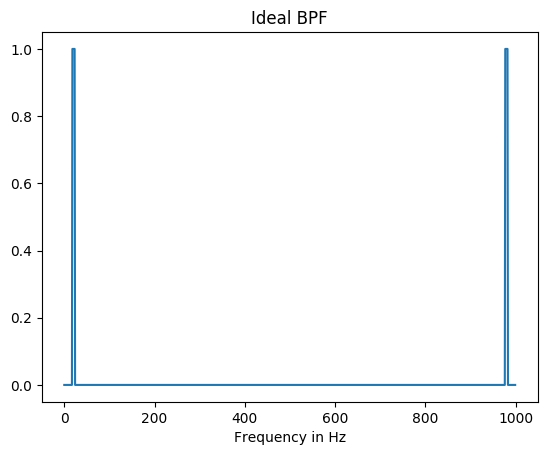

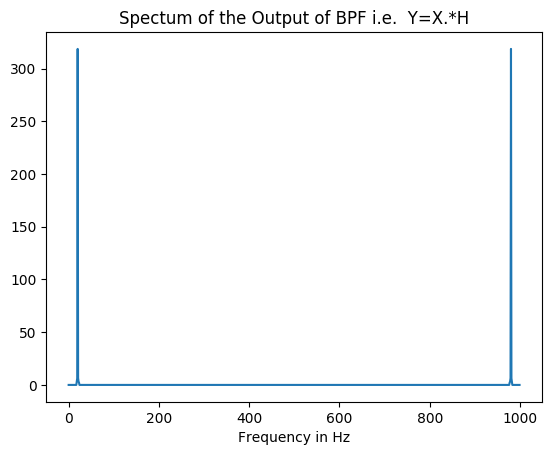

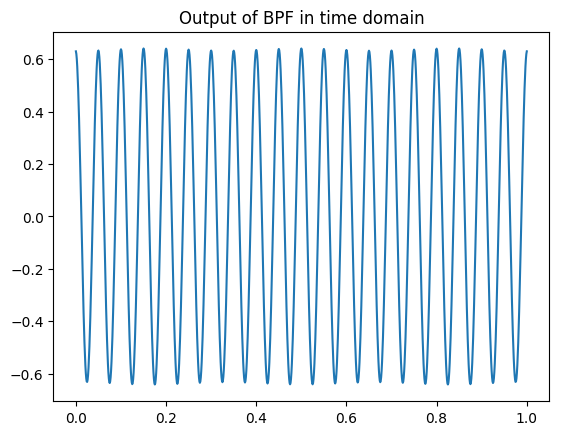

PyObject Text(0.5,1,'Output of BPF in time domain')

In [97]:
## Pass square wave through a BPF centred on fundamental ω0
## The BPF is narrow enough only to allow the fundamental component to pass.

B = 0.3*ω0/(2π) # filter bandwidth in Hz

# In the sampled frequency domain, position two rect() 
# i.e. centred on ω0 rad/s and on 2pi/Δt-ω0 rad/s.

H = rect((ω .- ω0)/(2*π*B)) + rect( (ω .+ (ω0 .- 2*π/Δt) )/(2*π*B) )

figure()
plot(f,H);    # Note, H in this case is purely real.
title("Ideal BPF")
xlabel("Frequency in Hz")

Y = X .* H

figure()
plot(f,abs.(Y))
title("Spectum of the Output of BPF i.e.  Y=X.*H")
xlabel("Frequency in Hz")

y = ifft(Y)   # Transform back to time domain using inverse transform

figure()
plot(t,y)
title("Output of BPF in time domain")



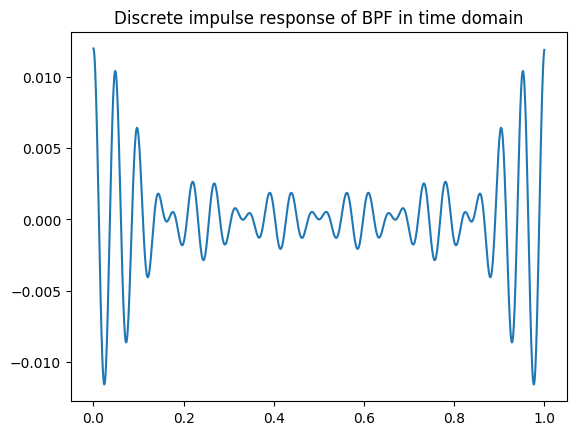

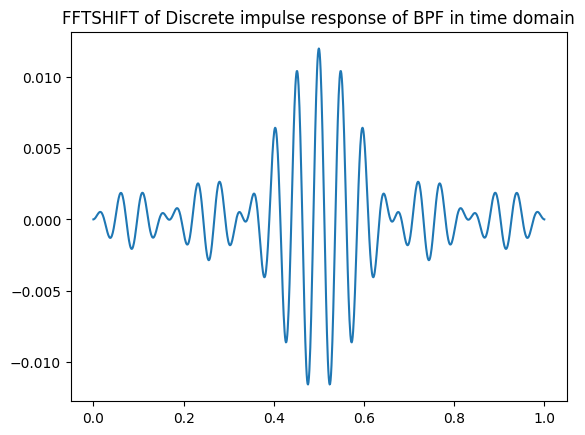

PyObject Text(0.5,1,'FFTSHIFT of Discrete impulse response of BPF in time domain')

In [98]:
# Plot discrete impulse response of BPF

figure()
plot(t,ifft(H))
title("Discrete impulse response of BPF in time domain")

figure()
plot(t,fftshift(ifft(H)))
title("FFTSHIFT of Discrete impulse response of BPF in time domain")


## A first order RC LPF  (derived from time domain impulse response)

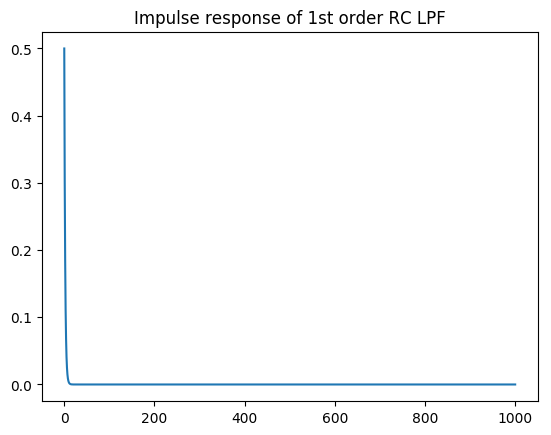

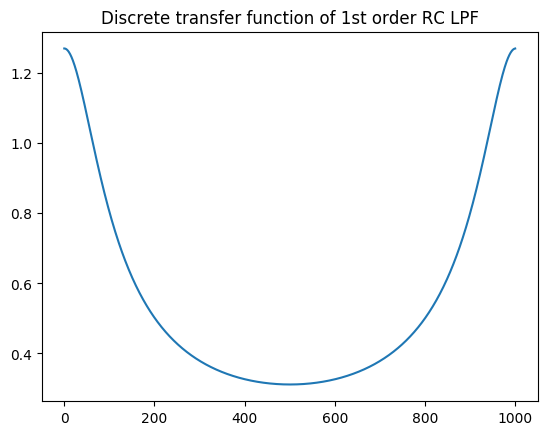

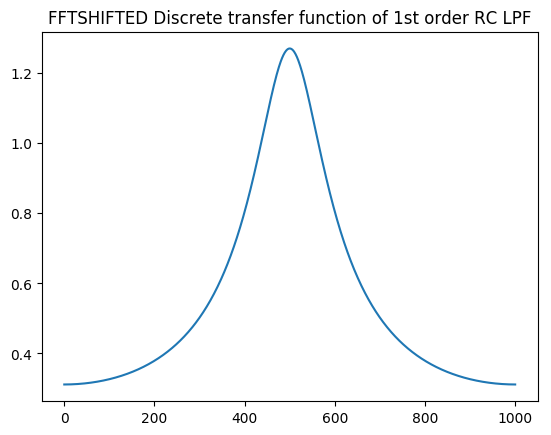

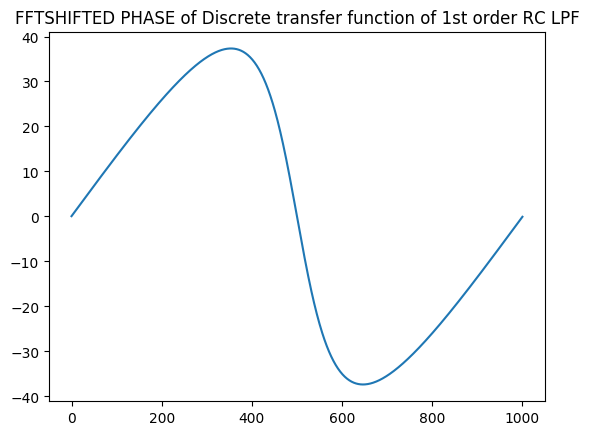

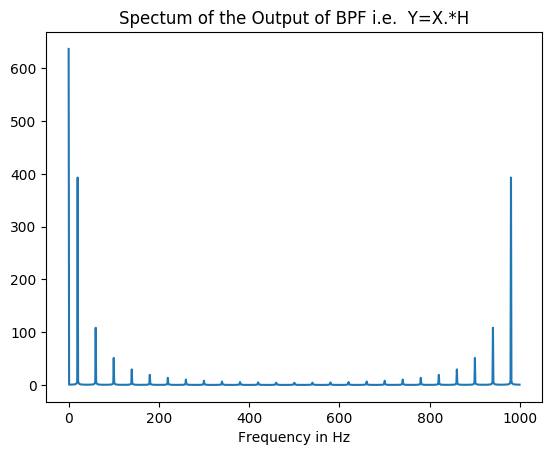

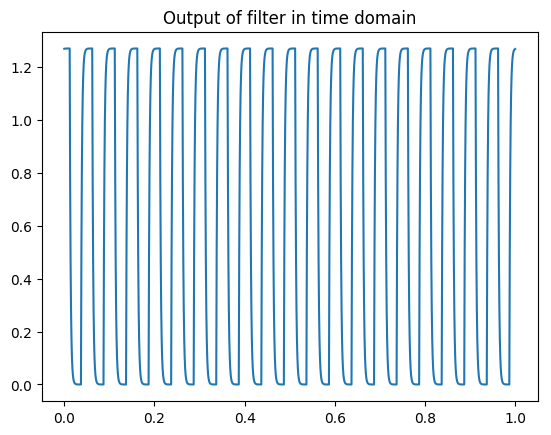

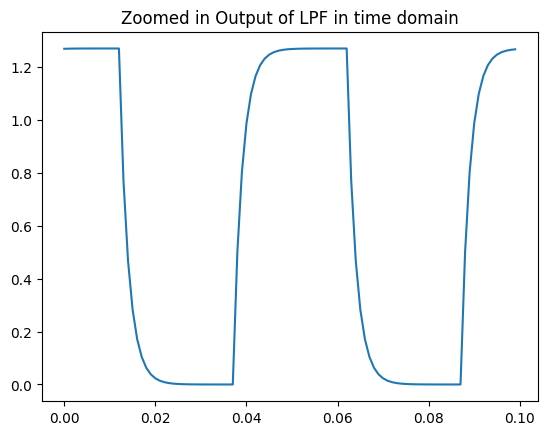

In [99]:
# Create a 1st order LPF
# Step response is v(t)=1-exp(-t/(RC))
# Impulse response is the derivative of the step response
# h(t)=dV/dt=1/(RC)*exp(-t/(RC))
# This is the response to an ideal dirac impulse (area 1)
# In continuous time, the output is the convolution integral (shift, multiply, integrate)
# In the sampled version, the output is a discrete convolution.
# The definition of discrete convolution is a summation that does not include a "Δt" factor, 
# so I must include it in h, if the output is to have the correct scaling factor.
# In practice, for the Riemann sum to be a good approximation to integration, it may be necessary to reduce Δt.


R=1
C=0.002

# Create a discrete impulse response to model an RC LPF
h = 1/(R*C).*exp.(-t/(R*C)) * Δt;   # with additional factor Δt

H = fft(h);

figure()
plot(h)
title("Impulse response of 1st order RC LPF")
figure()
plot(abs.(H))
title("Discrete transfer function of 1st order RC LPF")
figure()
plot(fftshift(abs.(H)))
title("FFTSHIFTED Discrete transfer function of 1st order RC LPF")
figure()
plot(fftshift(angle.(H)/pi*180))
title("FFTSHIFTED PHASE of Discrete transfer function of 1st order RC LPF")

# Feed pulse train through filter

Y = X .* H

figure()
plot(f,abs.(Y))
title("Spectum of the Output of BPF i.e.  Y=X.*H")
xlabel("Frequency in Hz")

y = ifft(Y)   # Transform back to time domain using inverse transform

figure()
plot(t,y)
title("Output of filter in time domain")


figure()
plot(t[1:100],y[1:100])
title("Zoomed in Output of LPF in time domain");